<div class="alert alert-block alert-success">
    <b><center>TENSORFLOW 2 LIBRARY</center></b>
    <b><center>Model Building - Sequential API</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras import utils, layers, activations, models, losses, optimizers

In [4]:
np.set_printoptions(linewidth=200, precision=2)
print("버전: ", tf.__version__)
print("즉시 실행 모드: ", tf.executing_eagerly())
print("GPU: ", "사용 가능" if tf.test.is_gpu_available() else "사용 불가능")
print("GPU Device: ", tf.config.experimental.get_visible_devices("GPU"))

버전:  2.4.1
즉시 실행 모드:  True
GPU:  사용 가능
GPU Device:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Prepare Data

In [5]:
iris = sns.load_dataset("iris")
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [6]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
iris = iris[iris.species.isin(["setosa", "versicolor"])]

In [8]:
iris.replace({ "species": {"setosa": 0, "versicolor": 1} }, inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


In [10]:
data = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
label = iris[["species"]].values

## Generate Model

In [11]:
model = models.Sequential([
    layers.Input((4,)),
    layers.Dense(32, activation=activations.sigmoid),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________


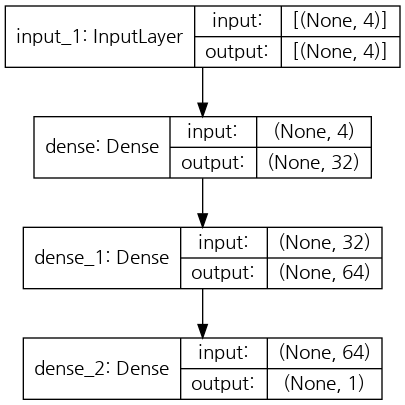

In [12]:
utils.plot_model(model, 'model.png', show_shapes=True)

In [13]:
model.compile(
    loss=losses.BinaryCrossentropy(),
    optimizer=optimizers.SGD()
)

## Training

In [14]:
history = model.fit(
    data, label, epochs=100
)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7069
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7097
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6894
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6926
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6747
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6758
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6726
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6696
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6692
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6661
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6634
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6610
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

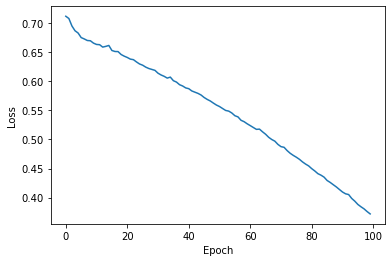

In [15]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history["loss"])
plt.show()